In [5]:
%reload_ext autoreload
%autoreload
%matplotlib inline
import os, json,glob,sys,io
from types import SimpleNamespace
from experiment import run_model
from eval import calculate_stats, eval_model
import pickle
from datetime import datetime 
import torch
from transformers import BertTokenizer
from model.MedClinical import Biobert_fc 
from sklearn.metrics import classification_report, f1_score
from util.tools  import *
from util.DataLoader  import *
from pathlib import Path, PureWindowsPath, PurePosixPath
import traceback
from matplotlib import pyplot as plt

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

In [7]:
config_folder = "config/"
conifg = load_config(config_folder)

In [8]:
dataprocessor = MultiClassificationProcessor()
test_dataloader, dev_data_len, dev_num_labels, dev_num_train_optimization_steps, all_dev_label_ids = dataprocessor.get_data_loader(config,source='test')    

AttributeError: type object 'config' has no attribute 'programsettings'

In [43]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_model_files = list(data_folder.glob('**/*.bin'))
num_labels = 9

f1_score_list = []
for model_file in list_model_files:
    try:
        print("\n Model file: ", model_file)
        model = torch.load(model_file)
        x =model.eval()
        test_inputs, test_preds, test_labels, test_loss = eval_model( model, test_dataloader, device, num_labels)  
        print(classification_report(test_labels,test_preds ))
        print("\n \n \n")
        f1_value = f1_score(test_labels, test_preds,average='macro')
        f1_score_list.append([model_file,f1_value ])
        
    except:
        print("Failed due to cpu & GPU incompatibility")
     # printing stack trace 
#         traceback.print_exc()         

print("\n \n \n")





 Model file:  outputs\re\BERT_Sequence2020-11-15 15_34_27_348184.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BERT_Sequence2020-11-15 18_33_16_910419.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BERT_Sequence2020-11-16 05_43_28_786014.bin



              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.75      0.86         8
           8       0.95      1.00      0.97        71

    accuracy                           0.93       100
   macro avg       0.80      0.77      0.78       100
weighted avg       0.91      0.93      0.92       100


 
 


 Model file:  outputs\re\BERT_Sequence2020-11-16 10_27_50_320534.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BERT_Sequence2020-11-16 22_21_41_536138.bin



              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.95       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.93      0.95      0.94       100


 
 


 Model file:  outputs\re\BERT_Sequence2020-11-20 04_03_11_148846.bin



              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.60      0.67         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.94       100
   macro avg       0.81      0.78      0.80       100
weighted avg       0.92      0.94      0.93       100


 
 


 Model file:  outputs\re\BERT_Sequence2020-11-20 12_33_00_408665.bin



              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.95       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.93      0.95      0.94       100


 
 


 Model file:  outputs\re\BioBERT2020-11-15 15_04_20_814323.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT2020-11-15 15_10_05_603490.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT2020-11-15 15_11_59_648261.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT2020-11-15 15_13_41_384476.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT2020-11-15 15_15_35_047604.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-15 15_33_17_032647.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-15 18_25_59_192174.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-15 21_37_11_126799.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-16 00_40_57_659995.bin



              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         1
           3       0.86      0.86      0.86         7
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           7       1.00      0.75      0.86         8
           8       0.95      1.00      0.97        71

    accuracy                           0.91       100
   macro avg       0.70      0.73      0.70       100
weighted avg       0.89      0.91      0.90       100


 
 


 Model file:  outputs\re\BioBERT_fc2020-11-16 03_37_07_579463.bin



              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.95       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.93      0.95      0.94       100


 
 


 Model file:  outputs\re\BioBERT_fc2020-11-16 09_42_50_419072.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-16 09_54_01_216248.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-16 10_17_23_898361.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-16 16_17_55_396529.bin



              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.95       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.93      0.95      0.94       100


 
 


 Model file:  outputs\re\BioBERT_fc2020-11-16 20_17_53_374127.bin



              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         1
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.94       100
   macro avg       0.83      0.78      0.80       100
weighted avg       0.92      0.94      0.93       100


 
 


 Model file:  outputs\re\BioBERT_fc2020-11-18 22_27_54_195406.bin



Failed due to cpu & GPU incompatibility

 Model file:  outputs\re\BioBERT_fc2020-11-20 01_41_02_300023.bin



              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.95       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.93      0.95      0.94       100


 
 


 Model file:  outputs\re\BioBERT_fc2020-11-20 08_58_14_655591.bin



              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           7       1.00      0.88      0.93         8
           8       0.95      1.00      0.97        71

    accuracy                           0.95       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.93      0.95      0.94       100


 
 


 
 



F1 Score summary 



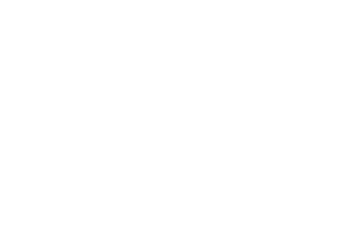

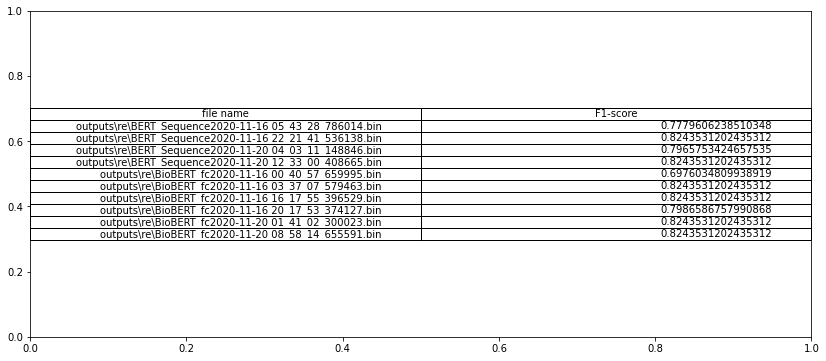

In [44]:
print ("F1 Score summary \n")  
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.figure(figsize=(14,6))
the_table = plt.table(cellText=f1_score_list,
                      colLabels=['file name', 'F1-score'],
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)